Importing profiles

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# datasets, classifiers and performance metrics
from sklearn import datasets, metrics, decomposition
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

**Read the dataset**

In [2]:
df = pd.read_csv('data.csv')
df = df.drop(['id','Unnamed: 32'], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**Checking unique features and info of the dataset**

In [4]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

**Statistical Description of the dataset**

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='diagnosis', ylabel='count'>

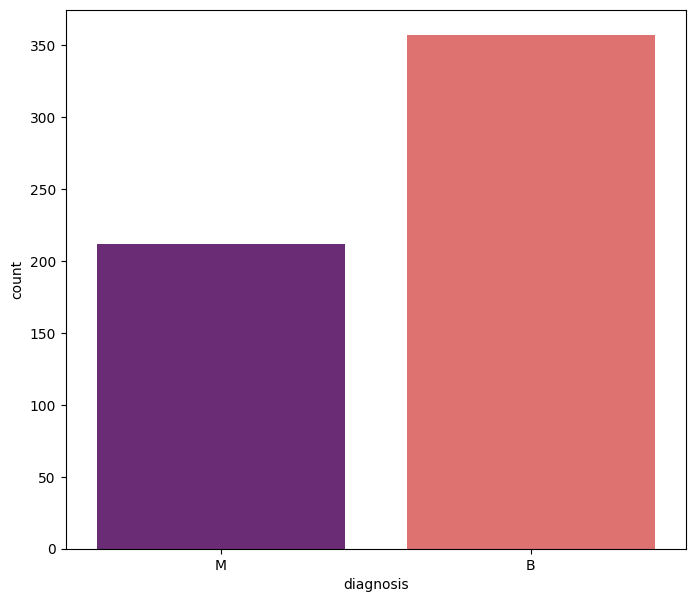

In [6]:
plt.figure(figsize = (8,7))
sns.countplot(x="diagnosis", data=df, palette='magma')

**Correlation heatmap between all features of the dataset**

<ipython-input-7-c40d021a8db6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


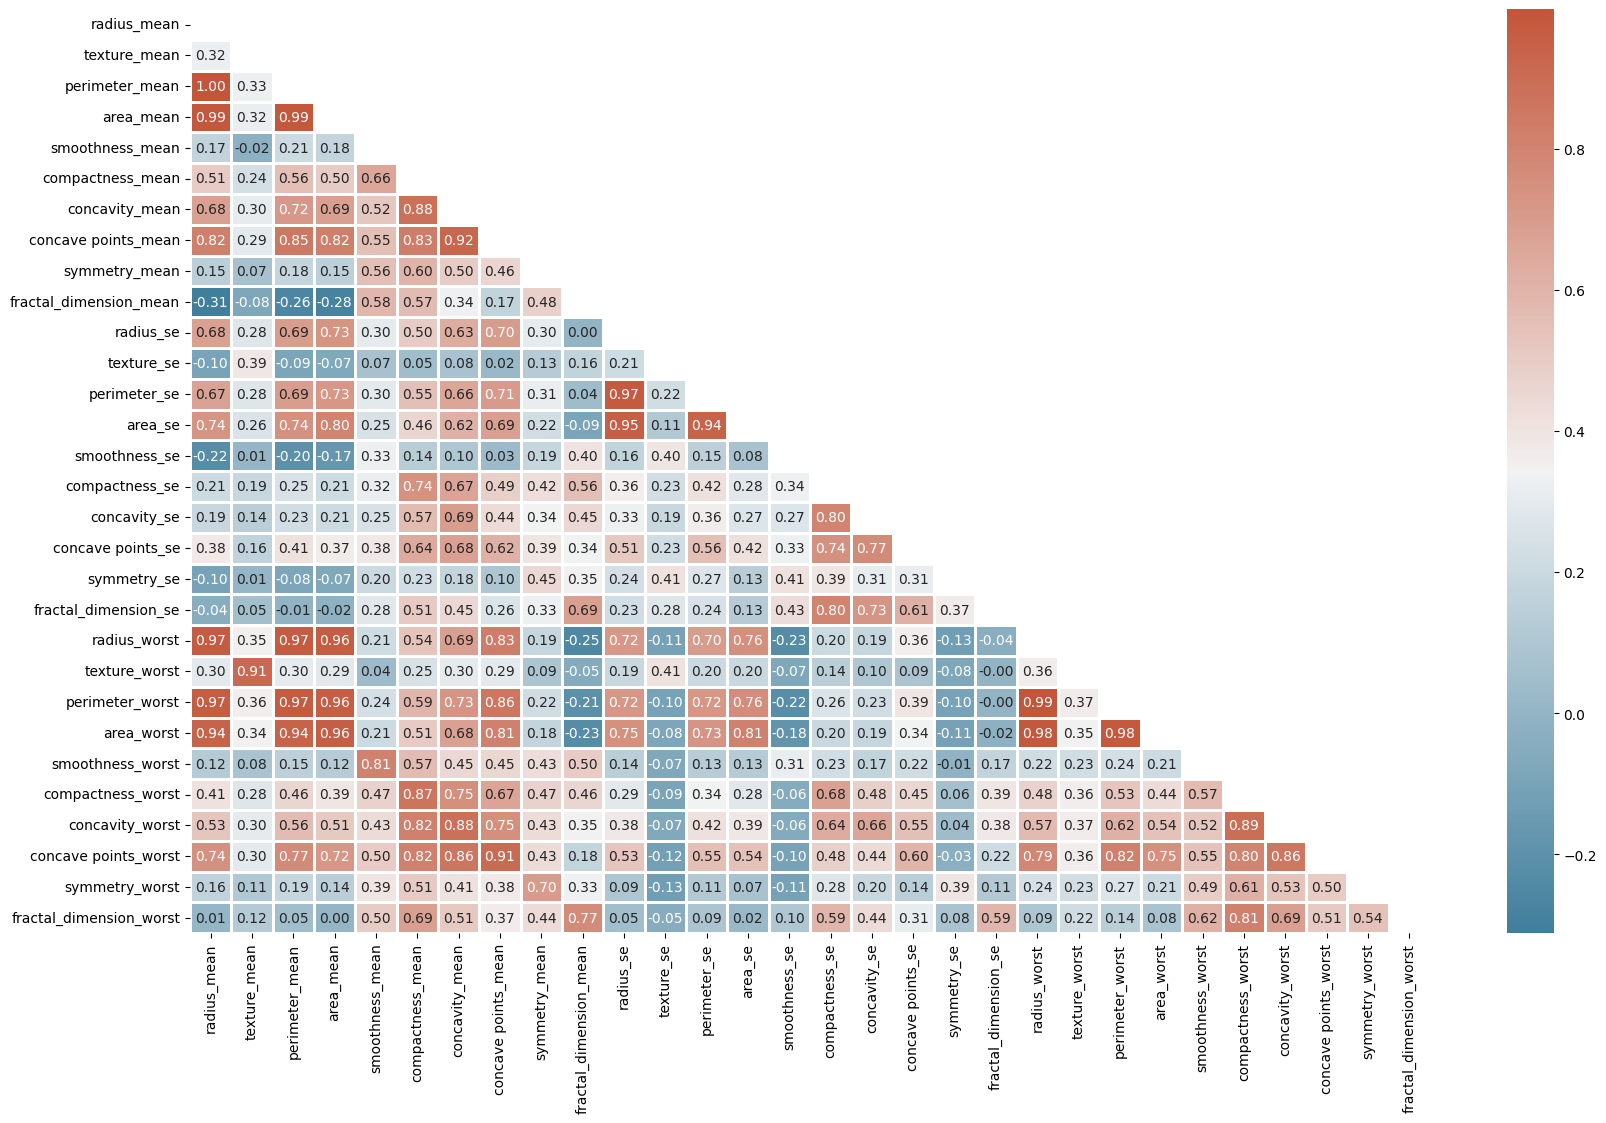

In [7]:
# heatmap 

plt.figure(figsize = (20, 12))

# compute the correlation matrix
corr = df.corr()
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, linewidths = 1, cmap=cmap, annot = True, fmt = ".2f")
plt.show()

**Removing highly correlated features**

In [8]:
corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 21 columns.


<ipython-input-8-04258ad6100f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


**Standardize the dataset**

In [9]:
Y = df["diagnosis"]
X = df.drop('diagnosis', axis=1)

In [10]:
# Standardize our data to have a mean of 0 and standard deviation of 1
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(569, 20)

**One-hot encoding on the labels**

In [11]:
# One-hot encoding our labels
label_Y = LabelEncoder()
Y = label_Y.fit_transform(Y)
Y.shape

(569,)

In [12]:
rows = df.drop('diagnosis', axis=1).columns
rows.shape

(20,)

# **PRINCIPAL COMPONENT ANALYSIS (PCA)**

In [13]:
n_components = 5
pca = decomposition.PCA(n_components=n_components)
pca.fit(X)
components = pca.transform(X)

In [14]:
columns = []
for i in range(n_components):
  columns.append(f'PC_{i+1}')

**Checking feature importance**

In [15]:
feature_importance = pd.DataFrame(pca.components_.T, index=rows, columns=columns)
feature_importance

,PC_1,PC_2,PC_3,PC_4,PC_5
smoothness_mean,0.231749,0.029707,-0.226315,-0.301459,0.289574
compactness_mean,0.323850,-0.074074,0.003800,0.004591,0.063654
symmetry_mean,0.229474,0.061742,-0.140773,-0.300389,0.027110
fractal_dimension_mean,0.221905,0.305740,-0.262968,0.075218,0.007141
texture_se,0.043104,0.267381,0.285782,-0.351113,-0.437686
area_se,0.146408,-0.210216,0.393022,-0.246915,0.256760
smoothness_se,0.086964,0.377203,0.078383,-0.268353,0.196659
compactness_se,0.279191,0.175674,0.184663,0.226843,-0.052662
concavity_se,0.244608,0.157831,0.246818,0.273336,0.000856
concave points_se,0.246660,0.101105,0.314206,0.085732,0.171792


In [16]:
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

81.54089542269178

In [17]:
variance_ratios = pd.DataFrame(pca.explained_variance_ratio_.reshape(1,n_components), columns=columns, index=['Explained Variance Ratio'])
variance_ratios

,PC_1,PC_2,PC_3,PC_4,PC_5
Explained Variance Ratio,0.417505,0.15068,0.108806,0.075913,0.062505


**Heatmap visualization of feature importance**

Text(158.08159722222223, 0.5, 'Features')

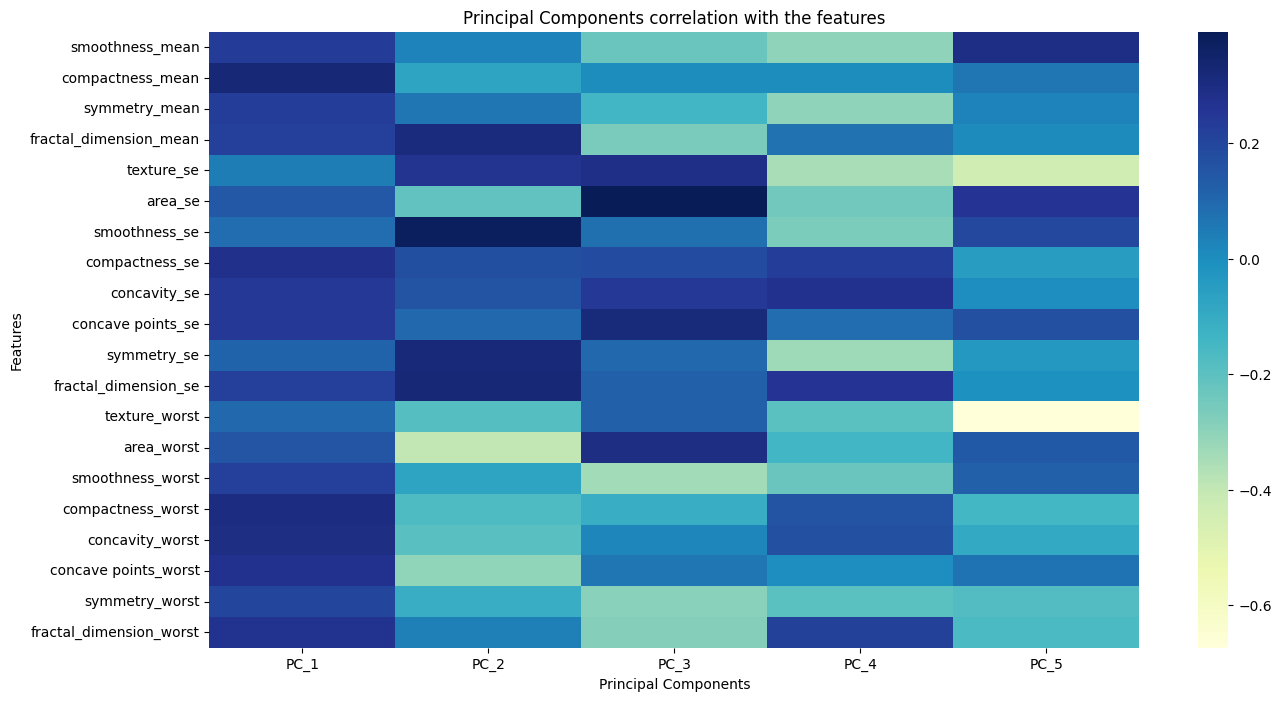

In [18]:
plt.figure(figsize=(15, 8))
sns.heatmap(feature_importance,cmap="YlGnBu")
plt.title('Principal Components correlation with the features')
plt.xlabel('Principal Components')
plt.ylabel('Features')

In [19]:
x_labels = {
   # str(i): f"PC{i+1}"
   # for i in range(n_components)
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

y_labels = {
    str(i): f"PC{i+1}"
    for i in range(n_components)
}


fig = px.scatter_matrix(
    components,
    color=df['diagnosis'],
    dimensions=range(5),
    labels=y_labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

# **LOGISTIC REGRESSION**

**Splitting the dataset**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(components, Y, test_size=0.2, shuffle=False, random_state=0)

**Fitting data to Logistic Regression model**

In [21]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

**Model prediction & Accuracy**

In [22]:
y_pred = lr.predict(X_test)

In [23]:
print(f"Classification report for classifier {lr}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier LogisticRegression(random_state=0):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.96      1.00      0.98        26

    accuracy                           0.99       114
   macro avg       0.98      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114




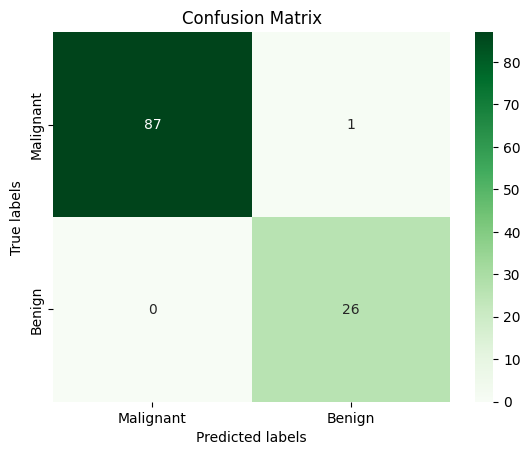

In [24]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Greens');  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Malignant', 'Benign']); ax.yaxis.set_ticklabels(['Malignant', 'Benign']);

**KNN Model**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9298245614035088